In [886]:
#import libraries
import numpy as np
from scipy import sparse as sparse
from scipy.sparse.linalg import eigs
from matplotlib import pyplot as plt



In [887]:
#define constants
h_bar = 197.3 #c^2 MeV fm
m_p = 4 * 931.494 # MeV c^2 -- mass of alpha particle
q_e = 1.44 #ke^2
e_p = 2 #number of protons in alpha particle
Polonium_212 = [212, -40, 84, 8.78, 'Polonium-212: Most commonly reported value ~8.78 MeV'] 
Thorium_224 = [224, -40, 90, 7, 'Thorium-224: Most commonly reported value ~6.9 MeV'] 
Bismuth_212 = [212, -40, 83, 6.2, 'Bismuth_212: Most commonly reported value ~6.2MeV'] 
Thorium_232 = [232, -40, 90, 4.5, 'Thorium-23: Most commonly reported value ~4.5 MeV'] 
Radon_222 = [222, -40, 86, 5.5, 'Radon_222: Most commonly reported value ~5.5 MeV'] #atomic number, nuclear strong force MeV, number of protons
N = 2000 #nsteps


In [888]:
def potential(atom_profile, x) :
    R_0 = 1.2 * ((atom_profile[0] - 4)**(1/3) + 4**(1/3))
    if 0 < x < R_0 :
        return atom_profile[1]
    else :
        return  ((2 * (atom_profile[2] - 2))/ (x)) * q_e


In [889]:
def calculate_potential(atom_profile, r) :
    v_diag = np.zeros(N)
    for i in range(len(r)) :
        v_diag[i] = potential(atom_profile, r[i])
    potential_term = sparse.diags((v_diag))
    return potential_term

In [890]:
def calculate_laplace(r):
    d = r[1] - r[0]
    main_diag = -2.0 / d**2 * np.ones(N)     
    off_diag  =  1.0 / d**2 * np.ones(N - 1)
    laplace_term = sparse.diags([main_diag, off_diag, off_diag], (0, -1, 1))
    return laplace_term
     

In [891]:
def build_hamiltonian(r):
    laplace_term =   calculate_laplace(r)
    
    potential_term = calculate_potential(Polonium_212, r)
     
    hamiltonian = ((-h_bar**2 / (2.0 * m_p)) * (laplace_term)) + potential_term
 
    return hamiltonian

In [892]:
def find_eigen_vectors_values(r, atom_profile):
    hamiltonian = build_hamiltonian(r)
    """ solve eigenproblem """
    number_of_eigenvalues = 10
    eigenvalues, eigenvectors = eigs(hamiltonian, k=number_of_eigenvalues, which='SM')
    """ sort eigenvalue and eigenvectors """
    eigenvectors = np.array([x for _, x in sorted(zip(eigenvalues, eigenvectors.T), key=lambda pair: pair[0])])
    eigenvalues = np.sort(eigenvalues)
    return eigenvectors,eigenvalues

In [893]:
#def plot(r, densities, eigenvalues, atom_profile):
def plot(r,r2, atom_profile):
    eigenvectors,eigenvalues = find_eigen_vectors_values(r, atom_profile)
    
    norm = [np.linalg.norm(eigenvectors[i, :], ord=None, axis=None, keepdims=False) for i in range(len(eigenvectors))]
    densities = [(np.absolute(eigenvectors[i, :]) / norm[i] ) for i in range(len(eigenvalues))]
    plt.title(atom_profile[4])
    v_diag = np.zeros(N)
    for i in range(len(r)) :
        v_diag[i] = potential(atom_profile, r[i])/197.3
    plt.xlabel('x (fm)')
    plt.ylabel('probability density ($fm^{-1}$)')
    energies = ['E = {: >5.2f} MeV'.format(eigenvalues[i].real ) for i in range(3)]
    plt.plot(r , (densities[0]) , color='blue',  label=energies[0])
    plt.plot(r , (densities[1]), color='green', label=energies[1])

    plt.plot(r, v_diag, color = 'black')
    plt.legend()
    plt.show()
    return

In [894]:
def plot2(r,atom_profile):
    v_diag = np.zeros(N)
    for i in range(len(r)) :
        v_diag[i] = potential(atom_profile, r[i])
    plt.plot(r , v_diag, color='black',  label='potential')
    plt.xlabel('x (fm)')
    plt.ylabel('probability density ($\\mathrm{\AA}^{-1}$)')
    plt.show()
    return



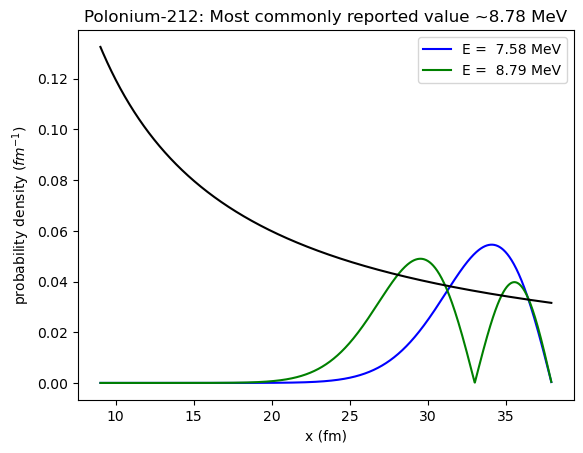

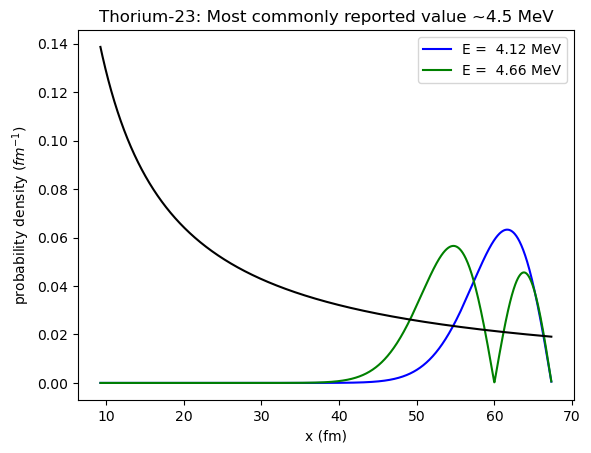

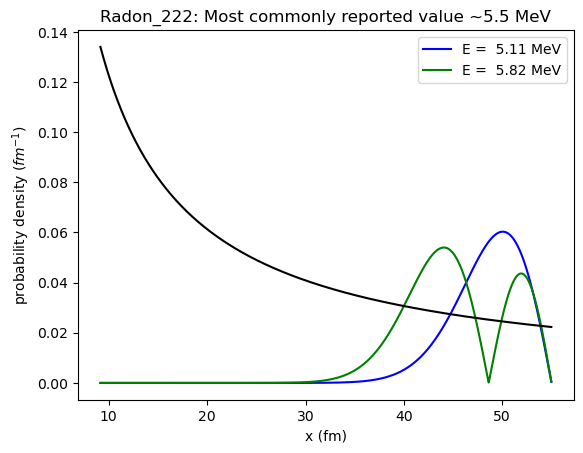

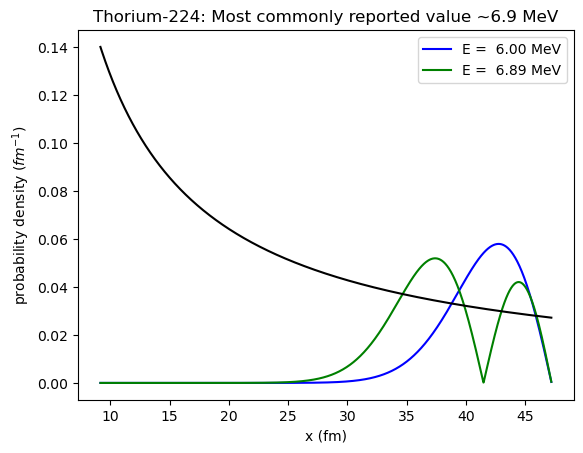

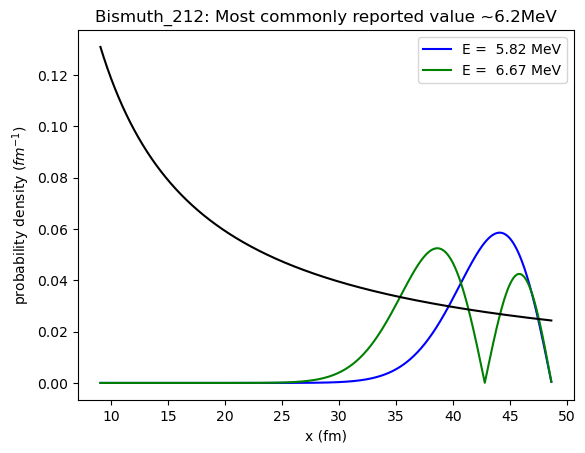

In [895]:

 
def find_r2(atom_profile) :
    r2 = ((2 * (atom_profile[2] - 2))/ (atom_profile[3] )) * q_e 
    return r2
def find_R_0(atom_profile) :
    R_0 = 1.2 * ((atom_profile[0] - 4)**(1/3) + 4**(1/3))
    return R_0
def find_r(atom_profile):
    r2 = find_r2(atom_profile)
    R_0 = find_R_0(atom_profile)
    final = r2 + 11
    r = np.linspace(final, R_0-0.00001 , N, endpoint=False)
    return r

plot(find_r(Polonium_212),find_r2(Polonium_212),  Polonium_212) 
plot(find_r(Thorium_232), find_r2(Thorium_232), Thorium_232) 
plot(find_r(Radon_222),find_r2(Radon_222),  Radon_222) 
plot(find_r(Thorium_224),find_r2(Thorium_224),  Thorium_224) 
plot(find_r(Bismuth_212),find_r2(Bismuth_212),  Bismuth_212) 